<a href="https://colab.research.google.com/github/luisaugustos/SoundCancellation/blob/master/test_noise_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

#### Download packages if in Google Colab

In [ ]:
colab_requirements = [
    "pip install tensorflow-gpu==2.0.0",
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=aa599d910f6308958d47f5dcf5fcb090ebab375eff33c875cb83a68346e78326
Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
Found existing installation: tensorflow-estimator 2.3.0
Uninstalling tensorflow-estimator-2.3.0:
Successfully uninstalled tensorflow-estimator-2.3.0
Found existing installation: gast 0.3.3
Uninstalling gast-0.3.3:
Successfully uninstalled gast-0.3.3
Found existing installation: tensorboard 2.3.0
Uninstalling tensorboard-2.3.0:
Successfully uninstalled tensorboard-2.3.0
Created wheel for noisereduce: filename=noisereduce-1.1.0-cp36-none-any.whl size=7610 sha256=5ffdd24dacc64b988b5b8e40a6df7b1043ae156ea45c81a253e19d83bac45f25
Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


# Test noise reduction algorithm and view steps of algorithm

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load data

In [ ]:
url = "https://raw.githubusercontent.com/luisaugustos/SoundCancellation/master/sounds/fish_16k.wav"
#url = "https://github.com/DaveHub5/SoundCancellation/blob/master/cafe_shortRR.wav?raw=true"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [ ]:
IPython.display.Audio(data=data, rate=rate)

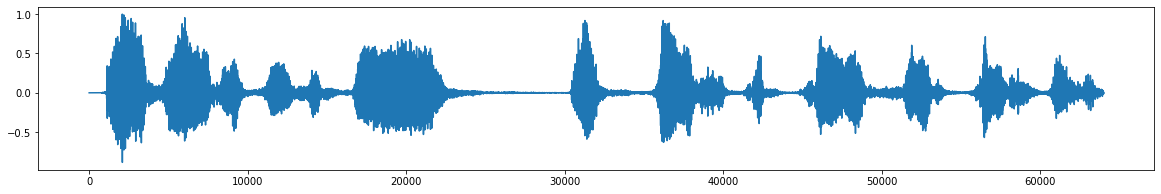

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### remove noise

In [ ]:
noise_reduced = nr.reduce_noise(audio_clip=audio_noised, noise_clip=dataNoise, prop_decrease=1, verbose=True) #was prop_decrease=1.0

NameError: ignored

##### playback recovered audio

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [ ]:
IPython.display.Audio(data=noise_reduced, rate=rate)

## A more difficult example 

In [ ]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [ ]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

In [ ]:
max(noise_data)

### add noise to data

In [ ]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + dataNoise

### plot noisy data

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

### reduce noise

In [ ]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe, noise_clip=noise_clip, verbose=True)

##### playback recovered audio

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [ ]:
IPython.display.Audio(data=noise_reduced, rate=rate)

## Use tensorflow as the backend for noise reduction

In [ ]:
noise_reduced = nr.reduce_noise(audio_clip=audio_cafe_noised.astype('float32'),
                                noise_clip=dataNoise.astype('float32'),
                                use_tensorflow=True, 
                                verbose=True)

In [ ]:
len(dataNoise), len(audio_cafe_noised)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_cafe_noised)
ax.plot(dataNoise, alpha = 0.5)

In [ ]:
IPython.display.Audio(data=noise_reduced, rate=rate)

### Compare times

In [ ]:
%%timeit
# non-tensorflow
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=False, 
                                verbose=False)

In [ ]:
%%timeit
# Use tensorflow
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

#### compare longer clips

In [ ]:
# make a longer clip by repeating the same clip a few times
longer_clip = np.concatenate([audio_clip_cafe.astype('float32') for i in range(100)])
print("Clip is {} seconds long.".format(round(len(longer_clip)/rate)))

In [ ]:
%%time
# non-tensorflow
noise_reduced = nr.reduce_noise(audio_clip=longer_clip,
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=False, 
                                verbose=False)

In [ ]:
%%time
# use tensorflow
noise_reduced = nr.reduce_noise(audio_clip=longer_clip,
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

### ensure that noise reduction does not cause distortion when prop_decrease == 0

In [ ]:
noise_reduced = nr.reduce_noise(audio_clip=data, noise_clip=noise_clip, prop_decrease=0, verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced[3000:5000])
ax.plot(data[3000:5000])